# Churn Analysis

In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.metrics import accuracy_score

#Import CSV
df = pd.read_csv(r'/Users/hagayshkoory/Desktop/Python Analysis Project/churn.csv')

#Set File Path
os.chdir('/Users/hagayshkoory/Desktop/Python Analysis Project')

In [56]:
df.shape

(7043, 21)

#### We have 7043 examples and 21 columns (20 features\variables and one label)

# Data Preperation

In [57]:
#Change columns to lower letters
df = df.rename(columns=str.lower)

#Change Yes/No to 1/0
df[['partner','dependents','churn']] = df[
    ['partner','dependents','churn']].replace(['Yes','No'],[1,0])


#Add new features
#single
df['single'] = None
df.loc[(df['partner']== 0) & (df['dependents']== 0),'single'] = 'Yes'
df.loc[(df['partner']== 1),'single'] = 'No'
df.loc[(df['dependents']== 1),'single'] = 'No'

#Tenure Group
df.loc[(df['tenure'] < 2),'tenuregroup'] = '0-2' 
df.loc[(df['tenure'] >= 2) & (df['tenure'] < 11),'tenuregroup'] = '2-10'
df.loc[(df['tenure'] >= 10) & (df['tenure'] < 20),'tenuregroup'] = '10-19'
df.loc[(df['tenure'] >= 20.),'tenuregroup'] = '20+'
df.loc[df['tenure'].isnull(),'tenuregroup'] = 'no tenure'


#Drop irelvant features
df = df.drop(columns=['customerid','gender','multiplelines','streamingtv','streamingmovies',
                      'partner','dependents','deviceprotection','onlinebackup'])


#### Check for Blanks - And replace them with Nulls

In [58]:
df = df.replace([' '],[None])

#### Check for Nulls

In [59]:
df.isna().sum()

seniorcitizen        0
tenure               0
phoneservice         0
internetservice      0
onlinesecurity       0
techsupport          0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
single               0
tenuregroup          0
dtype: int64

In [60]:
df.loc[df.totalcharges.isnull()]

,seniorcitizen,tenure,phoneservice,internetservice,onlinesecurity,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,single,tenuregroup
488,0,0,No,DSL,Yes,Yes,Two year,Yes,Bank transfer (automatic),52.55,None,0,No,0-2
753,0,0,Yes,No,No internet service,No internet service,Two year,No,Mailed check,20.25,None,0,No,0-2
936,0,0,Yes,DSL,Yes,No,Two year,No,Mailed check,80.85,None,0,No,0-2
1082,0,0,Yes,No,No internet service,No internet service,Two year,No,Mailed check,25.75,None,0,No,0-2
1340,0,0,No,DSL,Yes,Yes,Two year,No,Credit card (automatic),56.05,None,0,No,0-2
3331,0,0,Yes,No,No internet service,No internet service,Two year,No,Mailed check,19.85,None,0,No,0-2
3826,0,0,Yes,No,No internet service,No internet service,Two year,No,Mailed check,25.35,None,0,No,0-2
4380,0,0,Yes,No,No internet service,No internet service,Two year,No,Mailed check,20.00,None,0,No,0-2
5218,0,0,Yes,No,No internet service,No internet service,One year,Yes,Mailed check,19.70,None,0,No,0-2
6670,0,0,Yes,DSL,No,Yes,Two year,No,Mailed check,73.35,None,0,No,0-2


#### We have 11 Nulls (former blanks) in 'Total Charges' column

#### Now we can fill the Nulls with Tenure x Monthly Charges
#### Since we don't need this column, we will drop it.

In [61]:
df = df.drop(columns=['totalcharges'])

#### Change Columns Data Types

In [62]:
df = df.astype({'internetservice': 'string'})
df = df.astype({'onlinesecurity': 'string'})
df = df.astype({'paperlessbilling': 'string'})
df = df.astype({'phoneservice': 'string'})
df = df.astype({'techsupport': 'string'})
df = df.astype({'contract': 'string'})
df = df.astype({'paymentmethod': 'string'})
df = df.astype({'tenuregroup': 'string'})
df = df.astype({'single': 'string'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   phoneservice      7043 non-null   string 
 3   internetservice   7043 non-null   string 
 4   onlinesecurity    7043 non-null   string 
 5   techsupport       7043 non-null   string 
 6   contract          7043 non-null   string 
 7   paperlessbilling  7043 non-null   string 
 8   paymentmethod     7043 non-null   string 
 9   monthlycharges    7043 non-null   float64
 10  churn             7043 non-null   int64  
 11  single            7043 non-null   string 
 12  tenuregroup       7043 non-null   string 
dtypes: float64(1), int64(3), string(9)
memory usage: 715.4 KB


## Churn Distribution 

In [63]:
customers = len(df)
left = sum(df['churn'])
print("We have %d customers but only %d of them left (%f%%)" % (customers, left, (left/customers*100)))


We have 7043 customers but only 1869 of them left (26.536987%)


In [64]:
df['churn'].value_counts()

0    5174
1    1869
Name: churn, dtype: int64

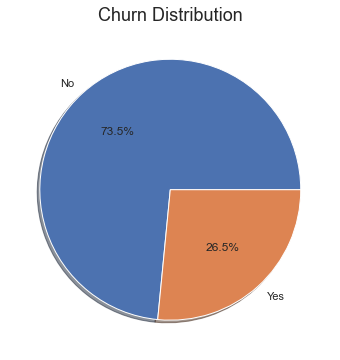

In [65]:
count = df['churn'].value_counts(sort = True)
labels=['No','Yes']
plt.figure(figsize=(6,6))
plt.title('Churn Distribution',fontsize = "18")
plt.pie(count,labels=labels,autopct='%1.1f%%',shadow=True )
plt.show()

### 1: Churn rate distribiotion by Tech Support & Tenure Group

In [66]:
TT = df.groupby(['techsupport','tenuregroup']).agg({'churn':'mean'})
TT

churn
techsupport         tenuregroup          
No                  0-2          0.742169
                    10-19        0.439926
                    2-10         0.560453
                    20+          0.264074
No internet service 0-2          0.337209
                    10-19        0.061135
                    2-10         0.109375
                    20+          0.014960
Yes                 0-2          0.378378
                    10-19        0.316940
                    2-10         0.388889
                    20+          0.102190

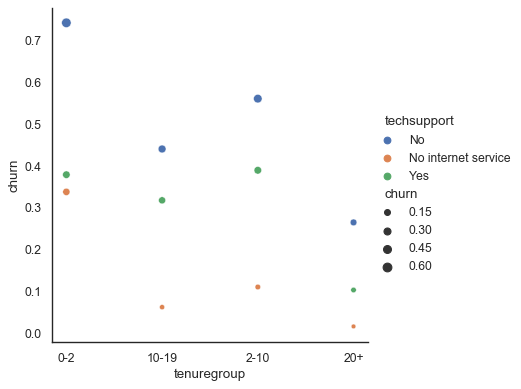

In [67]:
p = sns.relplot(data=TT,x="tenuregroup", y="churn",hue="techsupport",size='churn')
p.fig.set_dpi(80)

### 2: Churn rate distribiotion by Paperless Billing & Payment Method

In [68]:
pm = df.groupby(['paperlessbilling','paymentmethod']).agg({'churn':'mean'})
pm

churn
paperlessbilling paymentmethod                      
No               Bank transfer (automatic)  0.110260
                 Credit card (automatic)    0.100000
                 Electronic check           0.327448
                 Mailed check               0.134937
Yes              Bank transfer (automatic)  0.208754
                 Credit card (automatic)    0.190476
                 Electronic check           0.497704
                 Mailed check               0.272866

<AxesSubplot:xlabel='churn', ylabel='paymentmethod'>

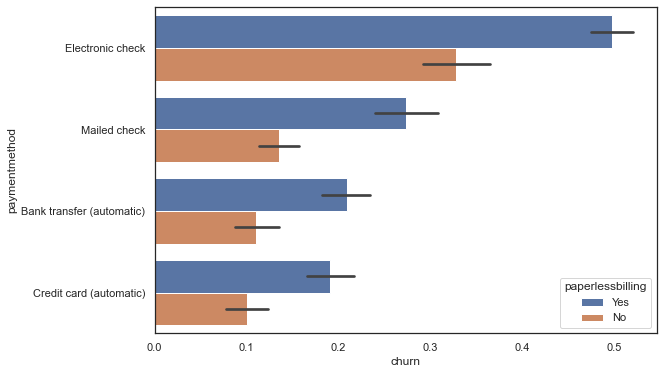

In [69]:
f, ax = plt.subplots(figsize=(9,6))
sns.barplot(x = "churn", y = "paymentmethod", hue = "paperlessbilling",data = df)

### 3: Churn rate distribiotion by Internet Service & Online Security

In [70]:
IO = df.groupby(['internetservice','onlinesecurity']).agg({'churn':['mean']})
IO

churn
                                         mean
internetservice onlinesecurity               
DSL             No                   0.279613
                Yes                  0.094915
Fiber optic     No                   0.493576
                Yes                  0.218117
No              No internet service  0.074050

<AxesSubplot:xlabel='churn', ylabel='internetservice'>

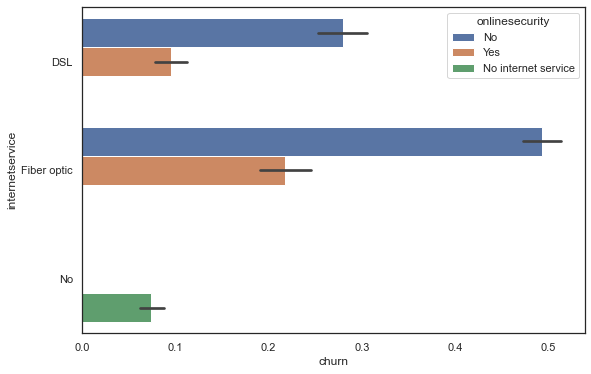

In [71]:
f, ax = plt.subplots(figsize=(9,6))
sns.barplot(x = "churn", y = "internetservice", hue = "onlinesecurity",data = df)

### 4: Churn rate distribiotion by Contract Type


In [72]:
df.groupby(['contract']).agg({'churn':'mean'},sort=True)


,churn
contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


<AxesSubplot:xlabel='contract', ylabel='churn'>

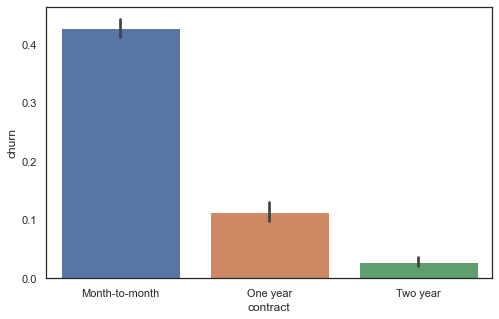

In [73]:
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(y = "churn", x = "contract", data = df)

### 5: Churn rate distribiotion by Single Column

In [74]:
single = df.groupby(['single']).agg({'churn':'mean'})
single

,churn
single,
No,0.198246
Yes,0.342378


<AxesSubplot:xlabel='single', ylabel='churn'>

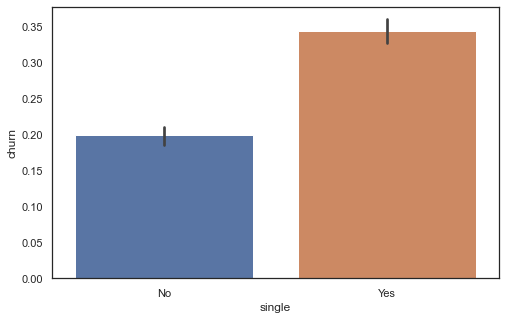

In [75]:
f, ax = plt.subplots(figsize=(8,5))
sns.barplot(y = "churn", x = "single", data = df)

# Data Cleaning

In [76]:
df = pd.read_csv(r'/Users/hagayshkoory/Desktop/Python Analysis Project/churn.csv')

#Change columns to lower letters
df = df.rename(columns=str.lower)

#Change Yes/No to 1/0
df[['partner','dependents','churn']] = df[['partner','dependents','churn']].replace(['Yes','No'],[1,0])

#Unite 'No internet service' with 'No' and change Yes/No to 1/0
df[['onlinesecurity','techsupport']] = df[['onlinesecurity','techsupport']].replace(['Yes','No','No internet service'],[1,0,0])

#Unite 'One Year' & 'Two Year' to 'Long Contract'
df['contract']=df['contract'].replace('One year','Long contract')
df['contract']=df['contract'].replace('Two year','Long contract')

#Removing letters from Customer ID column
df['customerid'] = df['customerid'].str[:4]
df = df.astype({"customerid": 'int64'}) 
df['customerid']

#Add new feature - single
df['single'] = None
df.loc[(df['partner']== 0) & (df['dependents']== 0),'single'] = 'Yes'
df.loc[(df['partner']== 1),'single'] = 'No'
df.loc[(df['dependents']== 1),'single'] = 'No'

#Drop irelvant features
df = df.drop(columns=['gender','multiplelines','streamingtv','streamingmovies','phoneservice',
                      'partner','dependents','deviceprotection','onlinebackup','totalcharges'])
df

,customerid,seniorcitizen,tenure,internetservice,onlinesecurity,techsupport,contract,paperlessbilling,paymentmethod,monthlycharges,churn,single
0,7590,0,1,DSL,0,0,Month-to-month,Yes,Electronic check,29.85,0,No
1,5575,0,34,DSL,1,0,Long contract,No,Mailed check,56.95,0,Yes
2,3668,0,2,DSL,1,0,Month-to-month,Yes,Mailed check,53.85,1,Yes
3,7795,0,45,DSL,1,1,Long contract,No,Bank transfer (automatic),42.30,0,Yes
4,9237,0,2,Fiber optic,0,0,Month-to-month,Yes,Electronic check,70.70,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840,0,24,DSL,1,1,Long contract,Yes,Mailed check,84.80,0,No
7039,2234,0,72,Fiber optic,0,0,Long contract,Yes,Credit card (automatic),103.20,0,No
7040,4801,0,11,DSL,1,0,Month-to-month,Yes,Electronic check,29.60,0,No
7041,8361,1,4,Fiber optic,0,0,Month-to-month,Yes,Mailed check,74.40,1,No


#### Check changed columns data changed properly and wasn't lost

In [77]:
df['onlinesecurity'].value_counts()

0    5024
1    2019
Name: onlinesecurity, dtype: int64

In [78]:
df['techsupport'].value_counts()

0    4999
1    2044
Name: techsupport, dtype: int64

In [79]:
df['customerid']

0       7590
1       5575
2       3668
3       7795
4       9237
        ... 
7038    6840
7039    2234
7040    4801
7041    8361
7042    3186
Name: customerid, Length: 7043, dtype: int64

In [80]:
df['contract'].value_counts()

Month-to-month    3875
Long contract     3168
Name: contract, dtype: int64

In [81]:
df = pd.get_dummies(df)
df

,customerid,seniorcitizen,tenure,onlinesecurity,techsupport,monthlycharges,churn,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Long contract,contract_Month-to-month,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,single_No,single_Yes
0,7590,0,1,0,0,29.85,0,1,0,0,0,1,0,1,0,0,1,0,1,0
1,5575,0,34,1,0,56.95,0,1,0,0,1,0,1,0,0,0,0,1,0,1
2,3668,0,2,1,0,53.85,1,1,0,0,0,1,0,1,0,0,0,1,0,1
3,7795,0,45,1,1,42.30,0,1,0,0,1,0,1,0,1,0,0,0,0,1
4,9237,0,2,0,0,70.70,1,0,1,0,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840,0,24,1,1,84.80,0,1,0,0,1,0,0,1,0,0,0,1,1,0
7039,2234,0,72,0,0,103.20,0,0,1,0,1,0,0,1,0,1,0,0,1,0
7040,4801,0,11,1,0,29.60,0,1,0,0,0,1,0,1,0,0,1,0,1,0
7041,8361,1,4,0,0,74.40,1,0,1,0,0,1,0,1,0,0,0,1,1,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerid                               7043 non-null   int64  
 1   seniorcitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   onlinesecurity                           7043 non-null   int64  
 4   techsupport                              7043 non-null   int64  
 5   monthlycharges                           7043 non-null   float64
 6   churn                                    7043 non-null   int64  
 7   internetservice_DSL                      7043 non-null   uint8  
 8   internetservice_Fiber optic              7043 non-null   uint8  
 9   internetservice_No                       7043 non-null   uint8  
 10  contract_Long contract                   7043 no

In [83]:
df.isna().sum()

customerid                                 0
seniorcitizen                              0
tenure                                     0
onlinesecurity                             0
techsupport                                0
monthlycharges                             0
churn                                      0
internetservice_DSL                        0
internetservice_Fiber optic                0
internetservice_No                         0
contract_Long contract                     0
contract_Month-to-month                    0
paperlessbilling_No                        0
paperlessbilling_Yes                       0
paymentmethod_Bank transfer (automatic)    0
paymentmethod_Credit card (automatic)      0
paymentmethod_Electronic check             0
paymentmethod_Mailed check                 0
single_No                                  0
single_Yes                                 0
dtype: int64

In [84]:
df = df.astype(float)

In [85]:
df.describe()

,customerid,seniorcitizen,tenure,onlinesecurity,techsupport,monthlycharges,churn,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Long contract,contract_Month-to-month,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,single_No,single_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,4997.269345,0.162147,32.371149,0.286668,0.290217,64.761692,0.265370,0.343746,0.439585,0.216669,0.449808,0.550192,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880,0.534289,0.465711
std,2855.656466,0.368612,24.559481,0.452237,0.453895,30.090047,0.441561,0.474991,0.496372,0.412004,0.497510,0.497510,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141,0.498858,0.498858
min,2.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2575.500000,0.000000,9.000000,0.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4992.000000,0.000000,29.000000,0.000000,0.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7451.000000,0.000000,55.000000,1.000000,1.000000,89.850000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,9995.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

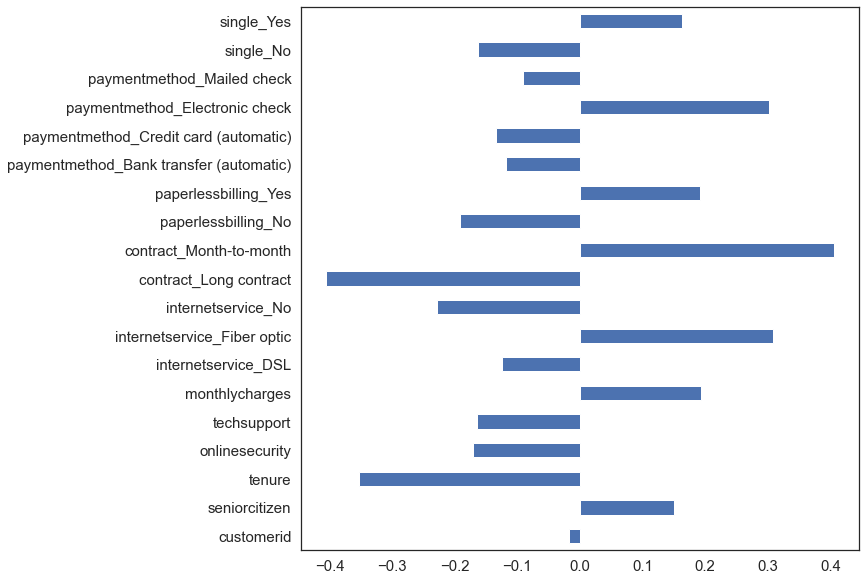

In [86]:
df.corr()['churn'].drop('churn').plot(kind='barh',figsize = (10,10),fontsize = 15)

<AxesSubplot:>

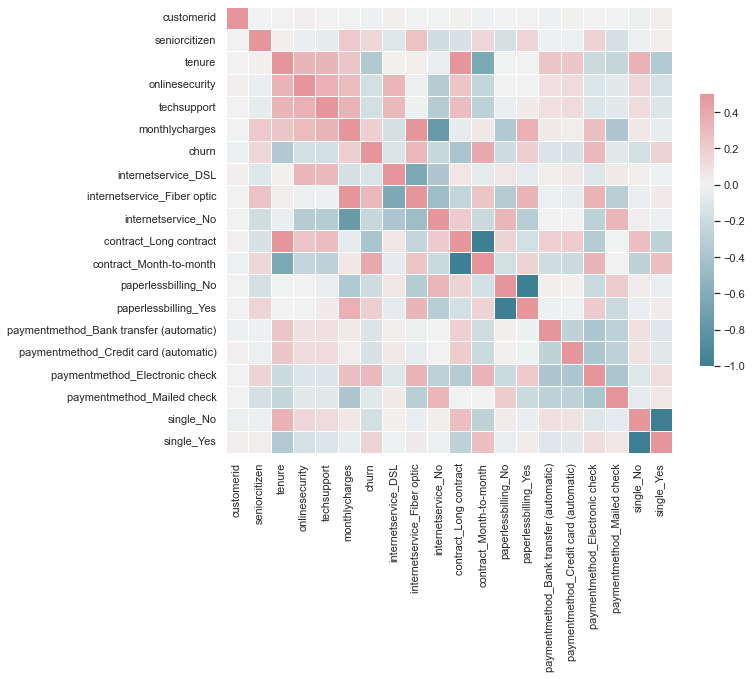

In [87]:
sns.set(style="white")
corr = df.corr()
f,ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.5, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

### We can see the high correlation for churn with Month to Month Contract and Tenure, in addition Long Contract shows the opposite correlation for churn

# Train & Test

In [88]:
df.shape

(7043, 20)

### We have 7043 customers, lets use 1400 (aproximetly 20%) for test and the rest for train and split to inputs and labels
### We will use skit learn libarary:

In [89]:
from sklearn.model_selection import train_test_split
test_size = 1400
train, test = train_test_split(df, test_size=test_size, random_state=0, shuffle=True)

label = 'churn'
cust = 'customerid'

x_train = train.drop(label, axis=1)
x_train = x_train.drop(cust, axis=1)

y_train = train[label]
cust_train = train[cust]

x_test = test.drop(label, axis=1)
x_test = x_test.drop(cust, axis=1)
y_test = test[label]
cust_test = test[cust]


In [90]:
train

,customerid,seniorcitizen,tenure,onlinesecurity,techsupport,monthlycharges,churn,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Long contract,contract_Month-to-month,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,single_No,single_Yes
1985,8901.0,0.0,12.0,0.0,0.0,29.20,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5889,9693.0,1.0,59.0,0.0,0.0,50.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6233,6394.0,0.0,3.0,0.0,0.0,20.70,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2453,1197.0,1.0,4.0,0.0,0.0,74.45,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2631,6861.0,1.0,7.0,0.0,0.0,99.25,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,4298.0,0.0,15.0,0.0,1.0,103.45,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3264,6818.0,0.0,10.0,0.0,1.0,91.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1653,6625.0,0.0,58.0,0.0,0.0,20.75,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2607,5539.0,1.0,1.0,0.0,0.0,69.75,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [91]:
test

,customerid,seniorcitizen,tenure,onlinesecurity,techsupport,monthlycharges,churn,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Long contract,contract_Month-to-month,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,single_No,single_Yes
2200,6296.0,0.0,19.0,0.0,0.0,58.20,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4627,3680.0,0.0,60.0,1.0,1.0,116.60,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3225,4931.0,0.0,13.0,1.0,0.0,71.95,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2828,8559.0,0.0,1.0,0.0,0.0,20.45,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3768,3537.0,0.0,55.0,0.0,0.0,77.75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,5973.0,0.0,51.0,0.0,1.0,87.35,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
914,6024.0,0.0,72.0,0.0,0.0,25.20,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1330,661.0,0.0,22.0,1.0,1.0,56.25,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3976,5261.0,0.0,4.0,0.0,0.0,24.45,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [92]:
y_test

2200    0.0
4627    0.0
3225    0.0
2828    0.0
3768    0.0
       ... 
413     0.0
914     0.0
1330    0.0
3976    1.0
4920    0.0
Name: churn, Length: 1400, dtype: float64

In [93]:
y_train

1985    1.0
5889    0.0
6233    0.0
2453    0.0
2631    1.0
       ... 
4931    0.0
3264    0.0
1653    0.0
2607    1.0
2732    0.0
Name: churn, Length: 5643, dtype: float64

In [94]:
x_train.shape, y_train.shape, cust_train.shape, x_test.shape, y_test.shape, cust_test.shape

((5643, 18), (5643,), (5643,), (1400, 18), (1400,), (1400,))

# Decision Tree - 1

In [95]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
output = pd.DataFrame({'customerid': cust_test, 'churn_what_actualy_happened':y_test, 'churn_predicted_by_model': y_test_pred_DecisionTree})
output


,customerid,churn_what_actualy_happened,churn_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,0.0


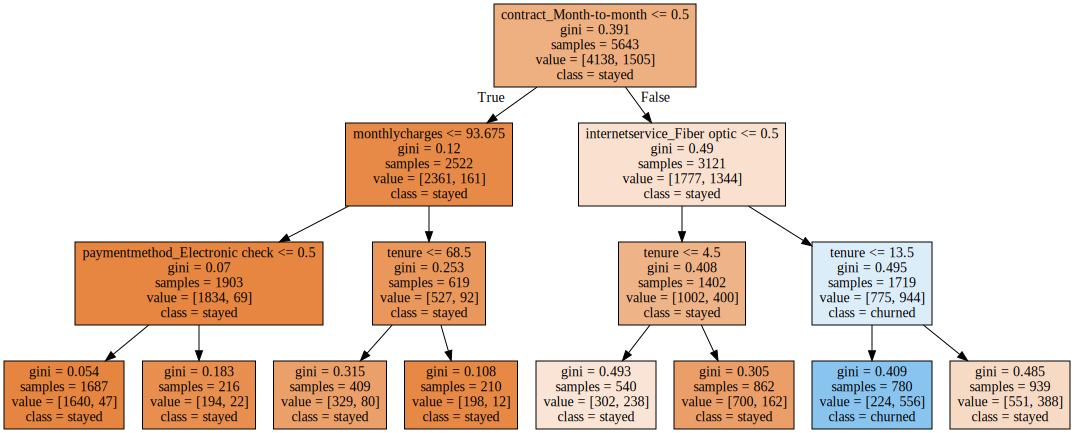

In [96]:
# Plotting the decision tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))

plot_tree(clf, x_train.columns, ['stayed','churned'])

In [97]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc_2 = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc_2

0.7792857142857142

# Decision Tree - 2

In [98]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
output = pd.DataFrame({'customerid': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree})
output


,customerid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,1.0


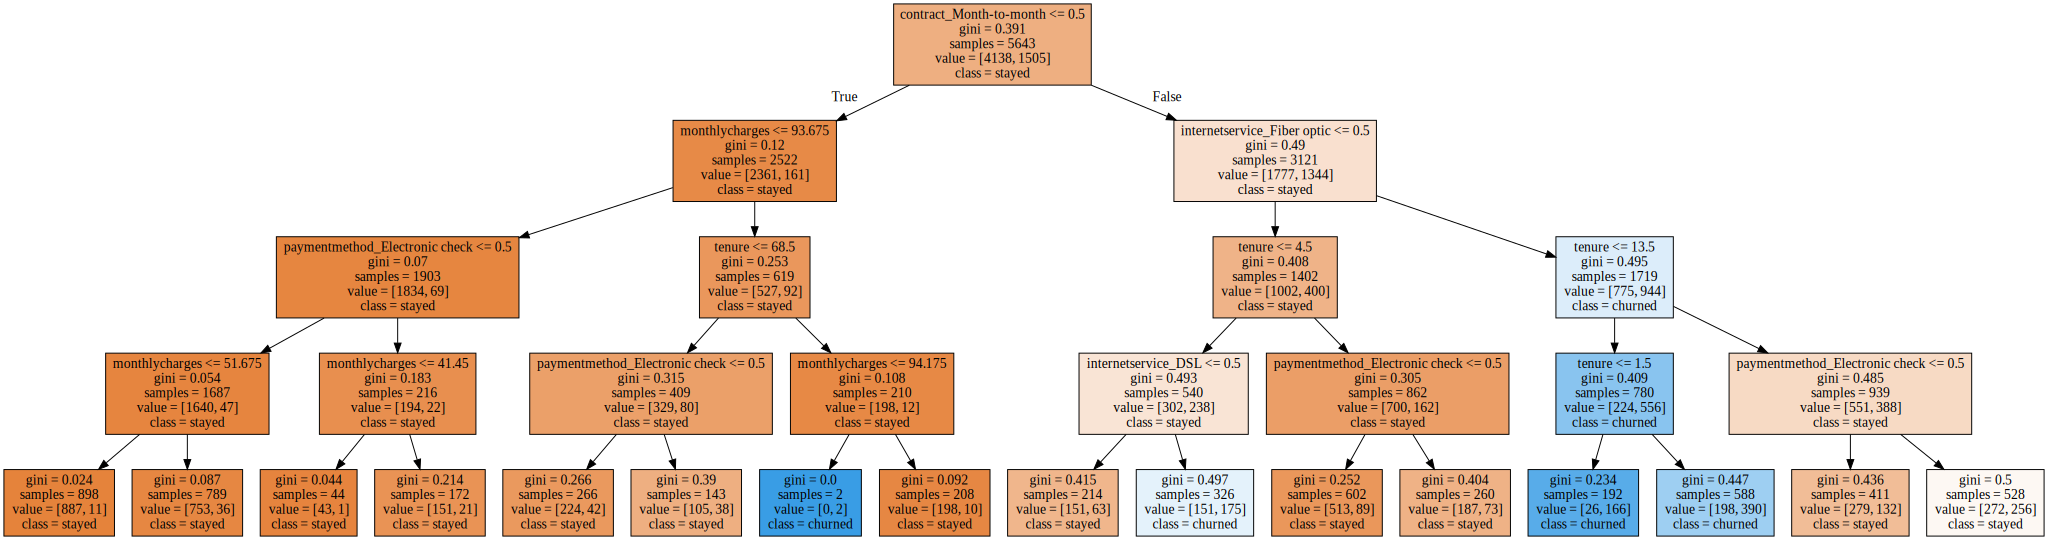

In [99]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
plot_tree(clf, x_train.columns, ['stayed','churned'])

In [100]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc_2 = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc_2

0.7742857142857142

# Decision Tree - 3

In [101]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
output = pd.DataFrame({'customerid': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_DecisionTree})
output

,customerid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,1.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,1.0


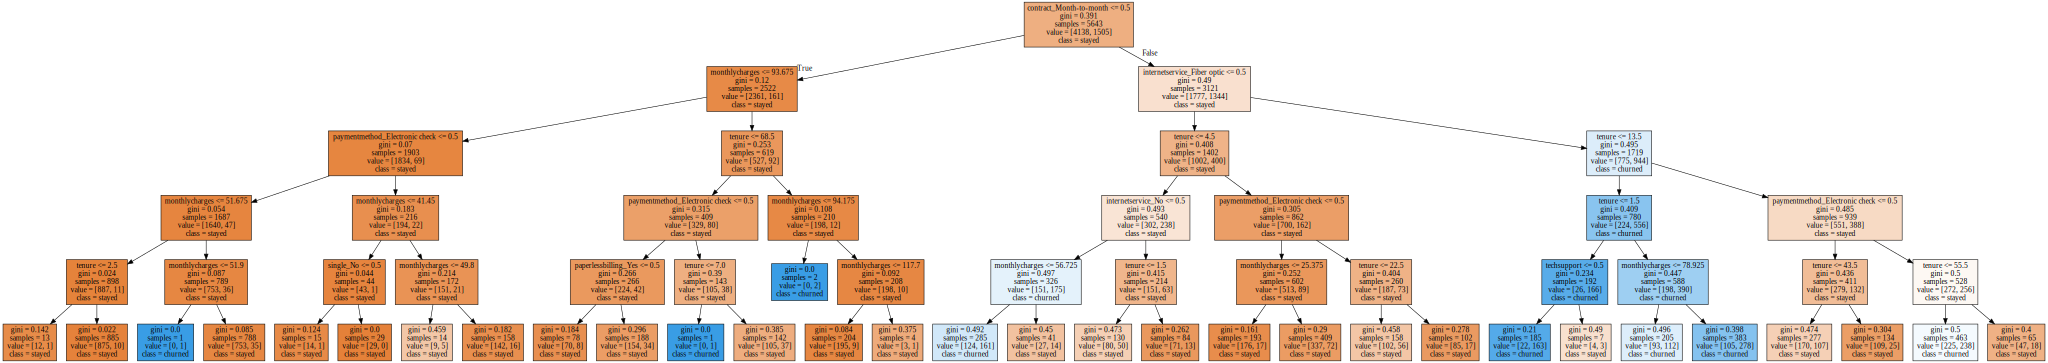

In [102]:
def plot_tree(tree, features, labels):
    graph = Source(export_graphviz(tree, feature_names=features, class_names=labels, filled = True))
    display(SVG(graph.pipe(format='svg')))
plot_tree(clf, x_train.columns, ['stayed','churned'])

In [103]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc_3 = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc_3

0.7857142857142857

# Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=101, max_depth=3, random_state=1)

            
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test)


output = pd.DataFrame({'cust': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})
output

,cust,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,0.0


### random forest accuarcy with 3 max depth

In [105]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.78

In [106]:
model = RandomForestClassifier(n_estimators=101, max_depth=4, random_state=1)

            
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test)


output = pd.DataFrame({'cust': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})
output

,cust,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,0.0


### random forest accuarcy with 4 max depth

In [107]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7942857142857143

In [108]:
model = RandomForestClassifier(n_estimators=101, max_depth=5, random_state=1)

            
model.fit(x_train, y_train) 

y_test_pred_RandomForest = model.predict(x_test)


output = pd.DataFrame({'cust': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_RandomForest})
output

,cust,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,0.0


### random forest accuarcy with 5 max depth

In [109]:
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.8014285714285714

### Feature Importances

In [110]:
feature_importances = model.feature_importances_ 
feature_importances

array([0.00752839, 0.21055443, 0.02032117, 0.01431663, 0.0763038 ,
       0.01819241, 0.10351848, 0.03624157, 0.18863853, 0.20053723,
       0.01273159, 0.01701737, 0.00259649, 0.00334268, 0.07427668,
       0.00337874, 0.00616783, 0.00433597])

In [111]:
features = x_train.columns
stats = pd.DataFrame({'feature':features, 'importance':feature_importances})
stats.sort_values('importance', ascending=False)

,feature,importance
1,tenure,0.210554
9,contract_Month-to-month,0.200537
8,contract_Long contract,0.188639
6,internetservice_Fiber optic,0.103518
4,monthlycharges,0.076304
14,paymentmethod_Electronic check,0.074277
7,internetservice_No,0.036242
2,onlinesecurity,0.020321
5,internetservice_DSL,0.018192
11,paperlessbilling_Yes,0.017017


Text(0.5, 1.0, 'Feature Importance')

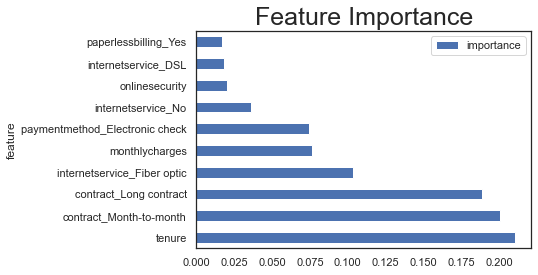

In [112]:
stats_sort = stats.sort_values('importance', ascending=False).head(10)
stats_sort.plot(y='importance', x='feature', kind='barh')
plt.title('Feature Importance',fontsize = "25")

# Knn - K Nearest Neighbors

## Show me your neighbors and I'll tell you who you are

In [113]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)      
clf.fit(x_train, y_train) 
y_test_pred_Knn = clf.predict(x_test)
output = pd.DataFrame({'customedid': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn})  
output

,customedid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,1.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,1.0


### Evaluation for the model above:

In [114]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7557142857142857

In [115]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=4)      
clf.fit(x_train, y_train) 
y_test_pred_Knn = clf.predict(x_test)
output = pd.DataFrame({'customedid': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn})  
output

,customedid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,1.0


In [116]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.775

In [117]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=6)      
clf.fit(x_train, y_train) 
y_test_pred_Knn = clf.predict(x_test)
output = pd.DataFrame({'customedid': cust_test, 'churned_what_actualy_happened':y_test, 'churned_predicted_by_model': y_test_pred_Knn})  
output

,customedid,churned_what_actualy_happened,churned_predicted_by_model
2200,6296.0,0.0,0.0
4627,3680.0,0.0,0.0
3225,4931.0,0.0,0.0
2828,8559.0,0.0,0.0
3768,3537.0,0.0,0.0
...,...,...,...
413,5973.0,0.0,0.0
914,6024.0,0.0,0.0
1330,661.0,0.0,0.0
3976,5261.0,1.0,1.0


In [118]:
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7757142857142857

#### Knn after standardization accuracy - 78%

In [119]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 

x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test) 
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train_scaled, y_train)

y_test_pred_Knn_Scaled = clf.predict(x_test_scaled)


output = pd.DataFrame({'customerid': cust_test, 'survived_what_actualy_happened':y_test, 'survived_predicted_by_model': y_test_pred_Knn, 'survived_predicted_by_model_scaled':y_test_pred_Knn_Scaled})


test_acc = accuracy_score(y_test, y_test_pred_Knn_Scaled)
test_acc

0.78

# Overfitting

## Decision Tree

In [120]:
# Decision Tree - max_depth = 3
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7792857142857142

In [121]:
# Decision Tree - max_depth = 4
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.7742857142857142

In [122]:
# Decision Tree - max_depth = 5
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(x_train, y_train)
y_test_pred_DecisionTree = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_DecisionTree)
test_acc

0.78

## Random Forest

In [123]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.78

In [124]:
model = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7821428571428571

In [125]:
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=1)        
model.fit(x_train, y_train)
y_test_pred_RandomForest = model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_RandomForest)
test_acc

0.7828571428571428

## Knn

In [126]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7557142857142857

In [127]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7757142857142857

In [128]:
clf = KNeighborsClassifier(n_neighbors=20)
clf.fit(x_train, y_train)
y_test_pred_Knn = clf.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred_Knn)
test_acc

0.7721428571428571